In [1]:
%run init_notebook.py

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from settings import WORK_DATA_DIR
from utils.load import load_data
from utils.plotting import cross_corr, df_cross_corr

In [9]:
# Load data
data_len = 8055 # 440, 660, 760, 1560, 8055
week_day = 'daily'
predicted = "sp_close_lead2"

df_w = load_data(file_name=f"df_{week_day}_{data_len}.csv", file_path=WORK_DATA_DIR)
data_dict = load_data(file_name=f"dict_{week_day}_{data_len}.pkl", file_path=WORK_DATA_DIR)

relevant_cols = data_dict["data"]["relevant_cols"]

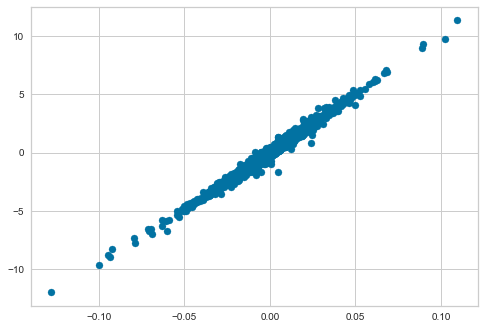

In [11]:
plt.scatter(df_w.sp_close, df_w.ff_M_RF)

In [6]:
X_ = df_w.pc_ratio

AttributeError: 'DataFrame' object has no attribute 'pc_ratio'

In [ ]:
X_.describe()

In [172]:
X_cut = pd.qcut(X_, q=10, duplicates='drop')

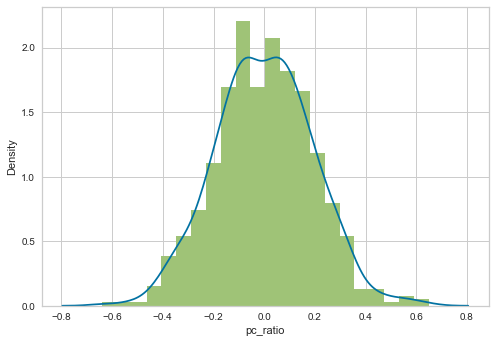

In [173]:
sns.kdeplot(X_)
plt.hist(X_, density=True, bins="fd");

In [176]:
X = X_ + X_.shift(1) + X.shift(2)
X = X_.rolling(3).mean()
X = X_
y = df_w[predicted]

In [177]:
print(f'dropping {X.isna().sum()} nans')
X = X.dropna()
y = y.loc[X.index]

dropping 0 nans


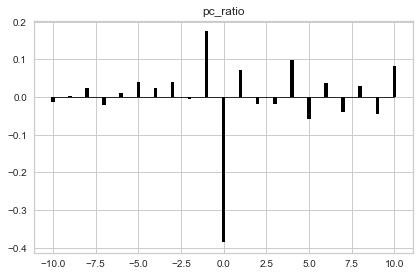

In [178]:
cross_corr(X, y, show_plot=True, figsize=(6, 4));

-0.3852191924720371

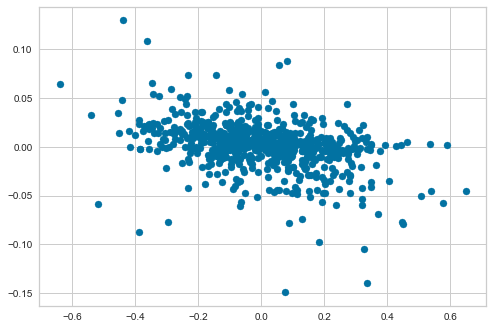

In [179]:
plt.scatter(X, y)
X.corr(y)

-0.7574676117759264


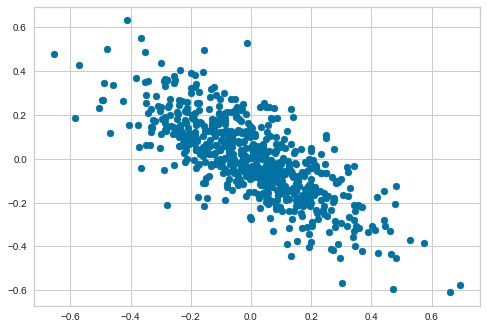

In [180]:
# plt.scatter(df_w["aaii_Bullish"], df_w[predicted])
plt.scatter(df_w["aaii_Bearish"], df_w['aaii_Bullish'])
print(df_w.aaii_Bearish.corr(df_w['aaii_Bullish']))